<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/05/logoBIGDIVE-01.png">
</center>

---

# PANDAS
(The initial version of this notebook was prepared by André Panisson for Big Dive 2016.)

---

In [2]:
2+2 #scrivere import antigravity

4

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
plt.rc('figure', figsize=(10, 6))

Series
======

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.

In [5]:
labels = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(randn(5), index=labels) #pd e' l'abbreviazione di pandas
s

a   -0.657945
b   -1.514976
c    1.222489
d   -0.850536
e    0.052939
dtype: float64

In [6]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

Operators that work in dictionaries also work on Series objects

In [7]:
'b' in s #controlla se c'e' un elemento con l'indice b

True

In [8]:
s['b']

-1.5149759355007197

We can transform a Series in a dictionary, and a dictionary in a Series

In [9]:
mapping = s.to_dict() #fa diventare una serie un dictionary
mapping

{'a': -0.65794498184733952,
 'b': -1.5149759355007197,
 'c': 1.2224894914245963,
 'd': -0.85053572196789906,
 'e': 0.052938522100574509}

In [10]:
s = pd.Series(mapping) #Questo crea una serie
s

a   -0.657945
b   -1.514976
c    1.222489
d   -0.850536
e    0.052939
dtype: float64

Slicing works in a Series the same way it works in numpy arrays

In [11]:
s[:3]

a   -0.657945
b   -1.514976
c    1.222489
dtype: float64

## DataFrame

A Pandas DataFrame is a 2D collection of Series. Each Series of a DataFrame is a column.

This is generally the most commonly used pandas object.

In [12]:
df = pd.DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df
#costruisce un dataFrame -> prendi quello che c'e' dentro le tonde ed usamelo per creare il data frame. 
#e' un approccio a dizionario --> ci sono le parentesi graffe
#ogni colonna e' una serie 

a    b         c
0 -0.569067  foo -0.903085
1  0.489096  bar  0.030652
2 -0.608586  foo  1.695856
3  1.636140  bar -0.874475
4 -0.675761  foo -1.383868
5 -0.794173  bar  0.016012

In [13]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [14]:
df.columns

Index([u'a', u'b', u'c'], dtype='object')

In [15]:
pd.date_range('1/1/2000', periods=6, freq='A')

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [16]:
df = pd.DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=pd.date_range('1/1/2000', periods=6)) #qui definisce l'indice.
# vedi http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html -> per avere la documentazione di date_range
df

a    b         c
2000-01-01  0.895213  foo  0.673794
2000-01-02 -0.104224  bar -1.832653
2000-01-03  1.752784  foo  0.160661
2000-01-04 -0.193379  bar -0.189489
2000-01-05  1.388966  foo  0.865845
2000-01-06 -0.573430  bar  1.412669

In [17]:
df = pd.DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd']) #in un data frame posso aggiungere la colonna in questo caso ho usato il costruttore
df

a    b         c    d
0  0.859454  foo -0.649192  NaN
1 -0.060341  bar  0.062406  NaN
2  0.819534  foo -0.017645  NaN
3 -1.282812  bar -0.557738  NaN
4  1.924477  foo  0.440056  NaN
5 -1.199418  bar  0.490368  NaN

Creation from nested dicts
--------------------------

These arise naturally in Python code

In [18]:
data = {} #crea dizionario vuoto
for col in ['foo', 'bar', 'baz']: #loop per la creazione delle colonne
    for row in ['a', 'b', 'c', 'd']: #loop che crea le righe
        data.setdefault(col, {})[row] = randn() #non e' un set default ma e' un get. Cercami quell'elemento se non c'e settimelo da default
data

{'bar': {'a': -1.9857925202836073,
  'b': -0.0470678772069314,
  'c': 0.956297177590333,
  'd': 0.2146609796202941},
 'baz': {'a': 0.2356380131237414,
  'b': -0.007058833387035488,
  'c': -1.3778097386097239,
  'd': -0.6485484064033661},
 'foo': {'a': -0.3209998303815116,
  'b': 1.6163381304466808,
  'c': 1.077593462529324,
  'd': 0.2671042003491444}}

In [19]:
pd.DataFrame(data)

bar       baz       foo
a -1.985793  0.235638 -0.321000
b -0.047068 -0.007059  1.616338
c  0.956297 -1.377810  1.077593
d  0.214661 -0.648548  0.267104

Data alignment
==============

In [20]:
close_px = pd.read_csv('stock_data.csv', index_col=0, parse_dates=True) #Close_px risultato e' un data frame

In [21]:
close_px.head() # head mi da le prime 5 righe se non specifico N= (numero righe)

AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
2007-10-29  37.41  185.09  34.46  106.78  57.13  31.78  65.67  1540.98  85.51
2007-10-30  36.43  187.00  34.39  106.15  56.99  32.70  65.80  1531.02  83.25
2007-10-31  36.79  189.95  34.97  108.01  57.30  33.84  65.69  1549.38  84.03
2007-11-01  35.22  187.44  34.27  105.72  56.85  34.07  64.51  1508.44  80.84
2007-11-02  35.83  187.87  34.27  106.59  56.95  34.07  65.03  1509.65  80.32

In [22]:
shape(close_px) # mi da il numero di righe e colonne

(1000, 9)

In [23]:
close_px.index

DatetimeIndex(['2007-10-29', '2007-10-30', '2007-10-31', '2007-11-01',
               '2007-11-02', '2007-11-05', '2007-11-06', '2007-11-07',
               '2007-11-08', '2007-11-09',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=1000, freq=None)

In [24]:
type(close_px['AAPL'])

pandas.core.series.Series

In [25]:
close_px.tail() #mi restituisce al coda

AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
2011-10-10  10.09  388.81  16.14  186.62  64.43  26.94  61.87  1194.89  76.28
2011-10-11  10.30  400.29  16.14  185.00  63.96  27.00  60.95  1195.54  76.27
2011-10-12  10.05  402.19  16.40  186.12  64.33  26.96  62.70  1207.25  77.16
2011-10-13  10.10  408.43  16.22  186.82  64.23  27.18  62.36  1203.66  76.37
2011-10-14  10.26  422.00  16.60  190.53  64.72  27.27  62.24  1224.58  78.11

In [26]:
close_px['AAPL'][-20:]

2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27    399.26
2011-09-28    397.01
2011-09-29    390.57
2011-09-30    381.32
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [27]:
close_px['AAPL'][-25:-10]

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27    399.26
2011-09-28    397.01
2011-09-29    390.57
2011-09-30    381.32
Name: AAPL, dtype: float64

In [28]:
#esempio *args *kwargs
def funzione(uno,*due,**tre):
    print 'uno => ',uno
    for i in due:
        print 'due => ',i
    for j in tre:
        print 'tre => ',j,tre[j]

myDict = {'prova':('uno','due','tre')}
funzione('Ciao mondo','cane', 'pippo', 'pluto',a=5,b=6,**myDict)

uno =>  Ciao mondo
due =>  cane
due =>  pippo
due =>  pluto
tre =>  a 5
tre =>  prova ('uno', 'due', 'tre')
tre =>  b 6


In [29]:
s1 = close_px['AAPL'][-20:] 
s2 = close_px['AAPL'][-25:-10]

def side_by_side(*objs, **kwds):
    #from pandas.core.common import adjoin <-- dipende dalla versione di panda . hanno spostato la classe da 
    # package ad un altro
    from pandas.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)
    
side_by_side(s1, s2) #stessi elementi ma non allineati

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [30]:
s1 + s2 #mi restituisce l'intersezione tra le due serie

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [31]:
pd.concat([s1,s2],axis=1) #metodo concat di Panda --> fa il match tra due liste e li mette vicino
#axis ha come valore 0

AAPL    AAPL
2011-09-12     NaN  379.94
2011-09-13     NaN  384.62
2011-09-14     NaN  389.30
2011-09-15     NaN  392.96
2011-09-16     NaN  400.50
2011-09-19  411.63  411.63
2011-09-20  413.45  413.45
2011-09-21  412.14  412.14
2011-09-22  401.82  401.82
2011-09-23  404.30  404.30
2011-09-26  403.17  403.17
2011-09-27  399.26  399.26
2011-09-28  397.01  397.01
2011-09-29  390.57  390.57
2011-09-30  381.32  381.32
2011-10-03  374.60     NaN
2011-10-04  372.50     NaN
2011-10-05  378.25     NaN
2011-10-06  377.37     NaN
2011-10-07  369.80     NaN
2011-10-10  388.81     NaN
2011-10-11  400.29     NaN
2011-10-12  402.19     NaN
2011-10-13  408.43     NaN
2011-10-14  422.00     NaN

In [32]:
close_px.tail()

AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
2011-10-10  10.09  388.81  16.14  186.62  64.43  26.94  61.87  1194.89  76.28
2011-10-11  10.30  400.29  16.14  185.00  63.96  27.00  60.95  1195.54  76.27
2011-10-12  10.05  402.19  16.40  186.12  64.33  26.96  62.70  1207.25  77.16
2011-10-13  10.10  408.43  16.22  186.82  64.23  27.18  62.36  1203.66  76.37
2011-10-14  10.26  422.00  16.60  190.53  64.72  27.27  62.24  1224.58  78.11

In [33]:
df = close_px.ix[-2:-1,0:3]
df

AA    AAPL     GE
2011-10-13  10.1  408.43  16.22

In [34]:
print close_px.shape[0]
print len(close_px.index)

1000
1000


In [35]:
df = close_px.ix[-10:, :3] # ultime 10 riche e il :3 sono le prime 3 colonne
df

AA    AAPL     GE
2011-10-03   8.90  374.60  14.69
2011-10-04   9.12  372.50  14.86
2011-10-05   9.37  378.25  15.27
2011-10-06   9.88  377.37  15.53
2011-10-07   9.71  369.80  15.50
2011-10-10  10.09  388.81  16.14
2011-10-11  10.30  400.29  16.14
2011-10-12  10.05  402.19  16.40
2011-10-13  10.10  408.43  16.22
2011-10-14  10.26  422.00  16.60

In [36]:
print s1

2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27    399.26
2011-09-28    397.01
2011-09-29    390.57
2011-09-30    381.32
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64


In [37]:
print s2.index
print s1.reindex(s2.index) #dammi le righe che sono presenti nella serie S2. In pratica ti dice che 
# gli elementi di s1 che sono presenti in s2

DatetimeIndex(['2011-09-12', '2011-09-13', '2011-09-14', '2011-09-15',
               '2011-09-16', '2011-09-19', '2011-09-20', '2011-09-21',
               '2011-09-22', '2011-09-23', '2011-09-26', '2011-09-27',
               '2011-09-28', '2011-09-29', '2011-09-30'],
              dtype='datetime64[ns]', freq=None)
2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27    399.26
2011-09-28    397.01
2011-09-29    390.57
2011-09-30    381.32
Name: AAPL, dtype: float64


In [38]:
side_by_side(s1.reindex(s2.index), s2) #stampami le cose a fianco --> 

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [39]:
b, c  = s1.align(s2, join='inner') #join fra le due serie --->  interesezione
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [40]:
b, c  = s1.align(s2, join='outer') # prende entrambi i valori nulli -> mi fa l'intersezione e lascia i null
#sia di uno che dell'altra serie
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

In [41]:
b, c  = s1.align(s2) #fa la join=outer
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

In [42]:
b, c  = s1.align(s2, join='right') #fa la join lasciando i NaN del primo insieme
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [43]:
b, c  = s1.align(s2, join='left') #fa la join lasciando i NaN del secondo insieme
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2011-10-05       NaN      
2011-10-06    377.37          2011-10-06       NaN      
2011-10-07    369.80          2011-10-07       NaN      
2011-10-10    388.81          2011-10-10       NaN      
2011-10-11    400.29          2011-10-11       NaN      
2011-10-12    402.19          2

In [44]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

AAPL     IBM   MSFT
2011-10-03  374.60  173.29  24.53
2011-10-04  372.50  174.74  25.34
2011-10-05  378.25  176.85  25.89
2011-10-06  377.37  181.69  26.34
2011-10-07  369.80  182.39  26.25
2011-10-10  388.81  186.62  26.94
2011-10-11  400.29  185.00  27.00
2011-10-12  402.19  186.12  26.96
2011-10-13  408.43  186.82  27.18
2011-10-14  422.00  190.53  27.27

In [45]:
df2 = df.ix[::2, ['IBM', 'MSFT']] #ix e' per l'indicizzazione
#in questo caso usa il passo 2
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [46]:
df + df2 #intersezione

AAPL     IBM   MSFT
2011-10-03   NaN  346.58  49.06
2011-10-04   NaN     NaN    NaN
2011-10-05   NaN  353.70  51.78
2011-10-06   NaN     NaN    NaN
2011-10-07   NaN  364.78  52.50
2011-10-10   NaN     NaN    NaN
2011-10-11   NaN  370.00  54.00
2011-10-12   NaN     NaN    NaN
2011-10-13   NaN  373.64  54.36
2011-10-14   NaN     NaN    NaN

In [47]:
b, c = df.align(df2, join='inner') #b contiene i dati con gli indici che compaiono in nell'inner join in df
#c contiene i dati con gli indici che compaiono nell'inner join in df2
side_by_side(b, c) 

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


In [48]:
b, c = df.align(df2, join='inner') 
a = df.align(df2,join='inner')[0]
d = df.align(df2,join='inner')

# il risultato identico per i tre se stampo i risultati nel seguente mpdo:
print(b)
print(a)
print(d[0])

               IBM   MSFT
2011-10-03  173.29  24.53
2011-10-05  176.85  25.89
2011-10-07  182.39  26.25
2011-10-11  185.00  27.00
2011-10-13  186.82  27.18
               IBM   MSFT
2011-10-03  173.29  24.53
2011-10-05  176.85  25.89
2011-10-07  182.39  26.25
2011-10-11  185.00  27.00
2011-10-13  186.82  27.18
               IBM   MSFT
2011-10-03  173.29  24.53
2011-10-05  176.85  25.89
2011-10-07  182.39  26.25
2011-10-11  185.00  27.00
2011-10-13  186.82  27.18


Transposing
-----------

In [49]:
df[:5].T #trasposizione dei dataframe

2011-10-03  2011-10-04  2011-10-05  2011-10-06  2011-10-07
AAPL      374.60      372.50      378.25      377.37      369.80
IBM       173.29      174.74      176.85      181.69      182.39
MSFT       24.53       25.34       25.89       26.34       26.25

Columns can be any type
-----------------------

In [50]:
n = 10
foo = pd.DataFrame(index=range(n)) #range di 10 elementi
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = pd.date_range('1/1/2000', periods=n)
foo

floats  ints strings  bools    objects
0  1.508305     0     foo   True 2000-01-01
1 -0.515218     1     bar  False 2000-01-02
2  1.698376     2     foo   True 2000-01-03
3  1.337222     3     bar   True 2000-01-04
4 -0.538794     4     foo  False 2000-01-05
5 -1.624498     5     bar  False 2000-01-06
6 -2.380561     6     foo  False 2000-01-07
7 -0.202393     7     bar  False 2000-01-08
8  0.178223     8     foo   True 2000-01-09
9 -0.477732     9     bar  False 2000-01-10

In [51]:
foo.dtypes #dice i tipi contenuti della serie

floats            float64
ints                int64
strings            object
bools                bool
objects    datetime64[ns]
dtype: object

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

Questi concetti servono se si usa spark

In [52]:
df.apply(np.mean) #apply = applica la funzione media ad ogni colonna --> Passa come parametro una funzione (axis di base e' sulle colonne)

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [53]:
df.apply(np.mean, axis=1) #applica la funzione all'axis=1 ovvero lavora per righe 

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

You can get as fancy as you want

In [54]:
close_px.head()

AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
2007-10-29  37.41  185.09  34.46  106.78  57.13  31.78  65.67  1540.98  85.51
2007-10-30  36.43  187.00  34.39  106.15  56.99  32.70  65.80  1531.02  83.25
2007-10-31  36.79  189.95  34.97  108.01  57.30  33.84  65.69  1549.38  84.03
2007-11-01  35.22  187.44  34.27  105.72  56.85  34.07  64.51  1508.44  80.84
2007-11-02  35.83  187.87  34.27  106.59  56.95  34.07  65.03  1509.65  80.32

In [55]:
def peak_date(series):
    return series.index[series.values.argmax()] #definisco delle funzioni ad hoc 
#la funzione peakdata restituisce l'indice (la data) che ha il valore massimo per ciascuna colonna
close_px.apply(peak_date) #applica la funzione non ho messo axis per cui lavoro per colonne

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [56]:
print(type(close_px.apply(peak_date)))

<class 'pandas.core.series.Series'>


In [57]:
df.apply(lambda x: x.max() - x.min()) #la funzione lambda mi prende l'indice del valore massimo
# lambda calcolo basato sul paradigma funzionale (java fino alla 7 segue il paradigma imperativo - dalla 8 permette di scrivere delle lambda)

AAPL    52.20
IBM     17.24
MSFT     2.74
dtype: float64

In [58]:
#Esempio funzione lambda
g = lambda x: x**2
print(g(8))

64


In [59]:
#altro esempio
df.apply(lambda x: x) #prima dei due punti c'e' l'argomento dopo i : e' la funzione ovvero come uso l'argomento
#in questo caso quando mi dai un argomento ti restituisco l'argomento

AAPL     IBM   MSFT
2011-10-03  374.60  173.29  24.53
2011-10-04  372.50  174.74  25.34
2011-10-05  378.25  176.85  25.89
2011-10-06  377.37  181.69  26.34
2011-10-07  369.80  182.39  26.25
2011-10-10  388.81  186.62  26.94
2011-10-11  400.29  185.00  27.00
2011-10-12  402.19  186.12  26.96
2011-10-13  408.43  186.82  27.18
2011-10-14  422.00  190.53  27.27

In [60]:
df.apply(lambda x : x**2) #l'apply applica a ciascun valore (elemento per elemento) ma la media mean mi da un
#solo valore

AAPL         IBM      MSFT
2011-10-03  140325.1600  30029.4241  601.7209
2011-10-04  138756.2500  30534.0676  642.1156
2011-10-05  143073.0625  31275.9225  670.2921
2011-10-06  142408.1169  33011.2561  693.7956
2011-10-07  136752.0400  33266.1121  689.0625
2011-10-10  151173.2161  34827.0244  725.7636
2011-10-11  160232.0841  34225.0000  729.0000
2011-10-12  161756.7961  34640.6544  726.8416
2011-10-13  166815.0649  34901.7124  738.7524
2011-10-14  178084.0000  36301.6809  743.6529

In [61]:
np.log(close_px)

AA      AAPL        GE       IBM       JNJ      MSFT  \
2007-10-29  3.621938  5.220842  3.539799  4.670771  4.045329  3.458837   
2007-10-30  3.595393  5.231109  3.537766  4.664853  4.042876  3.487375   
2007-10-31  3.605226  5.246761  3.554491  4.682224  4.048301  3.521644   
2007-11-01  3.561614  5.233459  3.534270  4.660794  4.040416  3.528417   
2007-11-02  3.578786  5.235750  3.534270  4.668990  4.042174  3.528417   
2007-11-05  3.561614  5.226714  3.530763  4.658521  4.037774  3.519573   
2007-11-06  3.579065  5.256401  3.530470  4.656528  4.039536  3.510650   
2007-11-07  3.548467  5.227358  3.502550  4.641406  4.028739  3.485845   
2007-11-08  3.555348  5.167468  3.501043  4.595625  4.039360  3.463859   
2007-11-09  3.540089  5.108185  3.484619  4.538817  4.048126  3.434310   
2007-11-12  3.506458  5.035393  3.481240  4.550714  4.065602  3.423937   
2007-11-13  3.527536  5.135563  3.505858  4.587719  4.080584  3.459152   
2007-11-14  3.533687  5.112650  3.500741  4.570165  4.074312  3.443618   
2007-11-15  3.519277  5.101694  3.482777  4.571717  4.074142  3.438493   
2007-11-16  3.518684  5.114334  3.491647  4.583129  4.086984  3.448081   
2007-11-19  3.484005  5.099562  3.478776  4.558288  4.084631  3.444257   
2007-11-20  3.492865  5.129011  3.475686  4.569957  4.085472  3.462606   
2007-11-21  3.486763  5.126698  3.452524  4.558288  4.078046  3.452207   
2007-11-23  3.486151  5.144816  3.466048  4.576050  4.080246  3.448717   
2007-11-26  3.478467  5.150629  3.440739  4.555875  4.087656  3.414772   
2007-11-27  3.483085  5.163700  3.460095  4.573886  4.093010  3.417399   
2007-11-28  3.516013  5.194178  3.486763  4.607468  4.101982  3.436565   
2007-11-29  3.525478  5.216511  3.478158  4.608664  4.102809  3.433342   
2007-11-30  3.520461  5.205215  3.482163  4.586803  4.093177  3.433665   
2007-12-03  3.495901  5.186603  3.446171  4.592996  4.092677  3.413126   
2007-12-04  3.489208  5.191901  3.427515  4.600560  4.096010  3.408835   
2007-12-05  3.499231  5.223055  3.440098  4.614823  4.099995  3.449988   
2007-12-06  3.506158  5.246761  3.455054  4.628887  4.101320  3.461665   
2007-12-07  3.535145  5.269403  3.454106  4.621240  4.092176  3.461037   
2007-12-10  3.560193  5.268940  3.458837  4.626051  4.093844  3.467609   
...              ...       ...       ...       ...       ...       ...   
2011-09-02  2.488234  5.924389  2.747912  5.117874  4.159976  3.250374   
2011-09-06  2.465554  5.939487  2.715357  5.106612  4.168833  3.239071   
2011-09-07  2.505526  5.950460  2.750471  5.119848  4.180981  3.258097   
2011-09-08  2.487404  5.951007  2.736962  5.107459  4.173618  3.266522   
2011-09-09  2.449279  5.933518  2.704711  5.083700  4.153242  3.248046   
2011-09-12  2.446685  5.940013  2.699346  5.090186  4.152456  3.253857   
2011-09-13  2.453588  5.952256  2.725235  5.096385  4.152771  3.259634   
2011-09-14  2.462150  5.964350  2.749832  5.119430  4.154655  3.277145   
2011-09-15  2.483239  5.973708  2.777576  5.136328  4.165114  3.295466   
2011-09-16  2.482404  5.992714  2.793004  5.153234  4.168060  3.300271   
2011-09-19  2.449279  6.020125  2.783776  5.154043  4.161068  3.303585   
2011-09-20  2.420368  6.024537  2.775086  5.163185  4.162315  3.295096   
2011-09-21  2.383243  6.021363  2.733068  5.153407  4.145196  3.257712   
2011-09-22  2.313525  5.996004  2.710713  5.127648  4.125843  3.221273   
2011-09-23  2.309561  6.002157  2.721953  5.131909  4.120500  3.221273   
2011-09-26  2.346602  5.999358  2.745346  5.161982  4.138202  3.236323   
2011-09-27  2.349469  5.989613  2.757475  5.180153  4.156067  3.245323   
2011-09-28  2.299581  5.983961  2.737609  5.179252  4.147095  3.241811   
2011-09-29  2.308567  5.967607  2.763800  5.188335  4.157319  3.236716   
2011-09-30  2.258633  5.943639  2.722610  5.164043  4.154028  3.214466   
2011-10-03  2.186051  5.925859  2.687167  5.154966  4.128424  3.199897   
2011-10-04  2.210470  5.920237  2.698673  5.163299  4.129873  3.232384   
2011-10-05  2.237513  

Plotting
========

Some basic plotting integration with matplotlib in Series / DataFrame

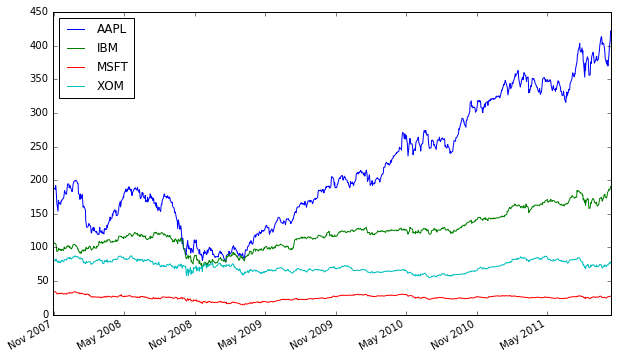

In [63]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot() #sta passando una lista di quattro nomi di colonni e mi prende 
#in automatico i valori della serie

In [64]:
close_px.ix[-1]

AA        10.26
AAPL     422.00
GE        16.60
IBM      190.53
JNJ       64.72
MSFT      27.27
PEP       62.24
SPX     1224.58
XOM       78.11
Name: 2011-10-14 00:00:00, dtype: float64

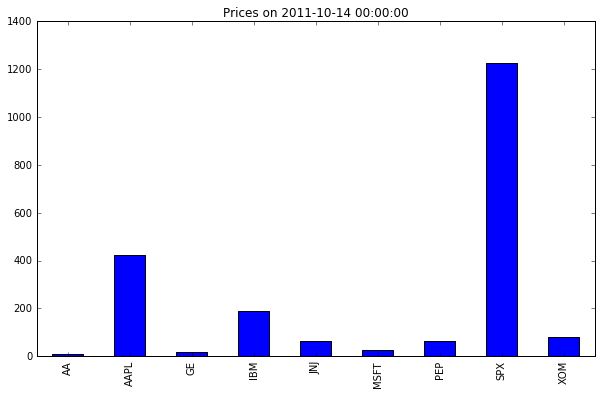

In [65]:
close_px.ix[-1].plot(kind='bar')
title('Prices on %s' % close_px.index[-1])
axhline(0)

GroupBy
=======

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)}) #crea un dataframe con un dizionario.
#Le chiavi sono A,B,C,D
df

A      B         C         D
0  foo    one  1.483142  0.684103
1  bar    one -0.531780 -0.566072
2  foo    two  0.403377  1.105132
3  bar  three -0.145688  1.752450
4  foo    two -2.300315  1.294842
5  bar    two -0.045016  0.220172
6  foo    one -1.023752  1.226505
7  foo  three  0.310247  0.628523

In [68]:
for key, group in df.groupby('A'): #mette il nome di uno delle colonne
    print 'key is ---> ' + key
    print group

key is ---> bar
     A      B         C         D
1  bar    one -0.531780 -0.566072
3  bar  three -0.145688  1.752450
5  bar    two -0.045016  0.220172
key is ---> foo
     A      B         C         D
0  foo    one  1.483142  0.684103
2  foo    two  0.403377  1.105132
4  foo    two -2.300315  1.294842
6  foo    one -1.023752  1.226505
7  foo  three  0.310247  0.628523


In [67]:
for key, group in df.groupby('A'): #mette il nome di uno delle colonne
    print key
    print group

bar
     A      B         C         D
1  bar    one -0.531780 -0.566072
3  bar  three -0.145688  1.752450
5  bar    two -0.045016  0.220172
foo
     A      B         C         D
0  foo    one  1.483142  0.684103
2  foo    two  0.403377  1.105132
4  foo    two -2.300315  1.294842
6  foo    one -1.023752  1.226505
7  foo  three  0.310247  0.628523


In [71]:
df.groupby('A')['C'].describe().T #preso il dataframe, groupby mi da il gruppo bar ed il gruppo foo. 
#poi decido che mi interessa solamete la colonna C e mi da la descrizione dei valori selezionati in termine statistic
#es mi da la media il count, la standard dev,ecc..

A         
bar  count    3.000000
     mean    -0.240828
     std      0.256950
     min     -0.531780
     25%     -0.338734
     50%     -0.145688
     75%     -0.095352
     max     -0.045016
foo  count    5.000000
     mean    -0.225460
     std      1.461509
     min     -2.300315
     25%     -1.023752
     50%      0.310247
     75%      0.403377
     max      1.483142
Name: C, dtype: float64

In [72]:
df.groupby('A').mean() #mi da la media

C         D
A                      
bar -0.240828  0.468850
foo -0.225460  0.987821

In [73]:
for key, group in df.groupby('A'):
    print key
    print group

bar
     A      B         C         D
1  bar    one -0.531780 -0.566072
3  bar  three -0.145688  1.752450
5  bar    two -0.045016  0.220172
foo
     A      B         C         D
0  foo    one  1.483142  0.684103
2  foo    two  0.403377  1.105132
4  foo    two -2.300315  1.294842
6  foo    one -1.023752  1.226505
7  foo  three  0.310247  0.628523


In [74]:
df.groupby(['A', 'B']).mean() # prima raggruppo nei gruppi che trovo la colonna A e poi vado per ciascun 
#gruppo vado a raggruppare per gli elementi che sono nella seconda colonna

C         D
A   B                        
bar one   -0.531780 -0.566072
    three -0.145688  1.752450
    two   -0.045016  0.220172
foo one    0.229695  0.955304
    three  0.310247  0.628523
    two   -0.948469  1.199987

In [75]:
df.groupby(['A', 'B'], as_index=False).mean()

A      B         C         D
0  bar    one -0.531780 -0.566072
1  bar  three -0.145688  1.752450
2  bar    two -0.045016  0.220172
3  foo    one  0.229695  0.955304
4  foo  three  0.310247  0.628523
5  foo    two -0.948469  1.199987

---

## Analysis of the baby names dataset

In [76]:
names = pd.read_csv('baby-names.csv')

In [82]:
names.head() #soundex --> radice del suono a livello fonetico per l'NLP

year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

In [78]:
names.dtypes

year         int64
name        object
prop       float64
sex         object
soundex     object
dtype: object

In [83]:
names.shape

(258000, 5)

In [84]:
names[names.year == 1880] #prende le righe le cui anno di nascita e' 1880

year        name      prop   sex soundex
0       1880        John  0.081541   boy    J500
1       1880     William  0.080511   boy    W450
2       1880       James  0.050057   boy    J520
3       1880     Charles  0.045167   boy    C642
4       1880      George  0.043292   boy    G620
5       1880       Frank  0.027380   boy    F652
6       1880      Joseph  0.022229   boy    J210
7       1880      Thomas  0.021401   boy    T520
8       1880       Henry  0.020641   boy    H560
9       1880      Robert  0.020404   boy    R163
10      1880      Edward  0.019965   boy    E363
11      1880       Harry  0.018175   boy    H600
12      1880      Walter  0.014822   boy    W436
13      1880      Arthur  0.013504   boy    A636
14      1880        Fred  0.013251   boy    F630
15      1880      Albert  0.012609   boy    A416
16      1880      Samuel  0.008648   boy    S540
17      1880       David  0.007339   boy    D130
18      1880       Louis  0.006993   boy    L200
19      1880         Joe  0.006174   boy    J000
20      1880     Charlie  0.006165   boy    C640
21      1880    Clarence  0.006165   boy    C465
22      1880     Richard  0.006148   boy    R263
23      1880      Andrew  0.005439   boy    A536
24      1880      Daniel  0.005430   boy    D540
25      1880      Ernest  0.005194   boy    E652
26      1880        Will  0.004966   boy    W400
27      1880       Jesse  0.004805   boy    J200
28      1880       Oscar  0.004594   boy    O260
29      1880       Lewis  0.004366   boy    L200
...      ...         ...       ...   ...     ...
129970  1880  Christiana  0.000041  girl    C623
129971  1880      Cleora  0.000041  girl    C460
129972  1880       Clora  0.000041  girl    C460
129973  1880     Coralie  0.000041  girl    C640
129974  1880        Dana  0.000041  girl    D500
129975  1880        Dave  0.000041  girl    D100
129976  1880       David  0.000041  girl    D130
129977  1880       Dayse  0.000041  girl    D200
129978  1880        Dean  0.000041  girl    D500
129979  1880     Delfina  0.000041  girl    D415
129980  1880      Deliah  0.000041  girl    D400
129981  1880      Delina  0.000041  girl    D450
129982  1880       Delle  0.000041  girl    D400
129983  1880        Dicy  0.000041  girl    D200
129984  1880       Donia  0.000041  girl    D500
129985  1880      Dulcie  0.000041  girl    D420
129986  1880        Earl  0.000041  girl    E640
129987  1880      Edward  0.000041  girl    E363
129988  1880      Edwina  0.000041  girl    E350
129989  1880         Ela  0.000041  girl    E400
129990  1880    Eleonora  0.000041  girl    E456
129991  1880        Elta  0.000041  girl    E430
129992  1880       Elvie  0.000041  girl    E410
129993  1880        Elza  0.000041  girl    E420
129994  1880      Elzada  0.000041  girl    E423
129995  1880     Emaline  0.000041  girl    E545
129996  1880       Ester  0.000041  girl    E236
129997  1880       Eulah  0.000041  girl    E400
129998  1880     Eulalie  0.000041  girl    E440
129999  1880        Euna  0.000041  girl    E500

[2000 rows x 5 columns]

In [86]:
names[names.year == 1880].shape

(2000, 5)

In [87]:
names[names.year == 1880].tail()

year     name      prop   sex soundex
129995  1880  Emaline  0.000041  girl    E545
129996  1880    Ester  0.000041  girl    E236
129997  1880    Eulah  0.000041  girl    E400
129998  1880  Eulalie  0.000041  girl    E440
129999  1880     Euna  0.000041  girl    E500

In [88]:
boys = names[names.sex == 'boy']    
girls = names[names.sex == 'girl']

In [89]:
print boys.shape, girls.shape

(129000, 5) (129000, 5)


In [92]:
boys.groupby('year') #groupby da un oggetto DataFrameGroupBy --> Funziona come il dizionario

In [93]:
boys.groupby('year').size()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
1885    1000
1886    1000
1887    1000
1888    1000
1889    1000
1890    1000
1891    1000
1892    1000
1893    1000
1894    1000
1895    1000
1896    1000
1897    1000
1898    1000
1899    1000
1900    1000
1901    1000
1902    1000
1903    1000
1904    1000
1905    1000
1906    1000
1907    1000
1908    1000
1909    1000
        ... 
1979    1000
1980    1000
1981    1000
1982    1000
1983    1000
1984    1000
1985    1000
1986    1000
1987    1000
1988    1000
1989    1000
1990    1000
1991    1000
1992    1000
1993    1000
1994    1000
1995    1000
1996    1000
1997    1000
1998    1000
1999    1000
2000    1000
2001    1000
2002    1000
2003    1000
2004    1000
2005    1000
2006    1000
2007    1000
2008    1000
dtype: int64

In [99]:
boys.groupby('year').count()

name  prop   sex  soundex
year                           
1880  1000  1000  1000     1000
1881  1000  1000  1000     1000
1882  1000  1000  1000     1000
1883  1000  1000  1000     1000
1884  1000  1000  1000     1000
1885  1000  1000  1000     1000
1886  1000  1000  1000     1000
1887  1000  1000  1000     1000
1888  1000  1000  1000     1000
1889  1000  1000  1000     1000
1890  1000  1000  1000     1000
1891  1000  1000  1000     1000
1892  1000  1000  1000     1000
1893  1000  1000  1000     1000
1894  1000  1000  1000     1000
1895  1000  1000  1000     1000
1896  1000  1000  1000     1000
1897  1000  1000  1000     1000
1898  1000  1000  1000     1000
1899  1000  1000  1000     1000
1900  1000  1000  1000     1000
1901  1000  1000  1000     1000
1902  1000  1000  1000     1000
1903  1000  1000  1000     1000
1904  1000  1000  1000     1000
1905  1000  1000  1000     1000
1906  1000  1000  1000     1000
1907  1000  1000  1000     1000
1908  1000  1000  1000     1000
1909  1000  1000  1000     1000
...    ...   ...   ...      ...
1979  1000  1000  1000     1000
1980  1000  1000  1000     1000
1981  1000  1000  1000     1000
1982  1000  1000  1000     1000
1983  1000  1000  1000     1000
1984  1000  1000  1000     1000
1985  1000  1000  1000     1000
1986  1000  1000  1000     1000
1987  1000  1000  1000     1000
1988  1000  1000  1000     1000
1989  1000  1000  1000     1000
1990  1000  1000  1000     1000
1991  1000  1000  1000     1000
1992  1000  1000  1000     1000
1993  1000  1000  1000     1000
1994  1000  1000  1000     1000
1995  1000  1000  1000     1000
1996  1000  1000  1000     1000
1997  1000  1000  1000     1000
1998  1000  1000  1000     1000
1999  1000  1000  1000     1000
2000  1000  1000  1000     1000
2001  1000  1000  1000     1000
2002  1000  1000  1000     1000
2003  1000  1000  1000     1000
2004  1000  1000  1000     1000
2005  1000  1000  1000     1000
2006  1000  1000  1000     1000
2007  1000  1000  1000     1000
2008  1000  1000  1000     1000

[129 rows x 4 columns]

In [94]:
names.groupby(['year', 'sex']).size()

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
      girl    1000
1883  boy     1000
      girl    1000
1884  boy     1000
      girl    1000
1885  boy     1000
      girl    1000
1886  boy     1000
      girl    1000
1887  boy     1000
      girl    1000
1888  boy     1000
      girl    1000
1889  boy     1000
      girl    1000
1890  boy     1000
      girl    1000
1891  boy     1000
      girl    1000
1892  boy     1000
      girl    1000
1893  boy     1000
      girl    1000
1894  boy     1000
      girl    1000
              ... 
1994  boy     1000
      girl    1000
1995  boy     1000
      girl    1000
1996  boy     1000
      girl    1000
1997  boy     1000
      girl    1000
1998  boy     1000
      girl    1000
1999  boy     1000
      girl    1000
2000  boy     1000
      girl    1000
2001  boy     1000
      girl    1000
2002  boy     1000
      girl    1000
2003  boy     1000
      girl    1000
2004  boy     1000
 

In [97]:
names.groupby(['year', 'sex']).count()

name  prop  soundex
year sex                      
1880 boy   1000  1000     1000
     girl  1000  1000     1000
1881 boy   1000  1000     1000
     girl  1000  1000     1000
1882 boy   1000  1000     1000
     girl  1000  1000     1000
1883 boy   1000  1000     1000
     girl  1000  1000     1000
1884 boy   1000  1000     1000
     girl  1000  1000     1000
1885 boy   1000  1000     1000
     girl  1000  1000     1000
1886 boy   1000  1000     1000
     girl  1000  1000     1000
1887 boy   1000  1000     1000
     girl  1000  1000     1000
1888 boy   1000  1000     1000
     girl  1000  1000     1000
1889 boy   1000  1000     1000
     girl  1000  1000     1000
1890 boy   1000  1000     1000
     girl  1000  1000     1000
1891 boy   1000  1000     1000
     girl  1000  1000     1000
1892 boy   1000  1000     1000
     girl  1000  1000     1000
1893 boy   1000  1000     1000
     girl  1000  1000     1000
1894 boy   1000  1000     1000
     girl  1000  1000     1000
...         ...   ...      ...
1994 boy   1000  1000     1000
     girl  1000  1000     1000
1995 boy   1000  1000     1000
     girl  1000  1000     1000
1996 boy   1000  1000     1000
     girl  1000  1000     1000
1997 boy   1000  1000     1000
     girl  1000  1000     1000
1998 boy   1000  1000     1000
     girl  1000  1000     1000
1999 boy   1000  1000     1000
     girl  1000  1000     1000
2000 boy   1000  1000     1000
     girl  1000  1000     1000
2001 boy   1000  1000     1000
     girl  1000  1000     1000
2002 boy   1000  1000     1000
     girl  1000  1000     1000
2003 boy   1000  1000     1000
     girl  1000  1000     1000
2004 boy   1000  1000     1000
     girl  1000  1000     1000
2005 boy   1000  1000     1000
     girl  1000  1000     1000
2006 boy   1000  1000     1000
     girl  1000  1000     1000
2007 boy   1000  1000     1000
     girl  1000  1000     1000
2008 boy   1000  1000     1000
     girl  1000  1000     1000

[258 rows x 3 columns]

In [100]:
type(names.groupby(['year', 'sex']).size())

pandas.core.series.Series

In [101]:
names.groupby(['year', 'sex']).size().ix[2000]    

sex
boy     1000
girl    1000
dtype: int64

In [102]:
boys[boys.year == 2000]   # il campo prop ti dice in pratica quale e' l'occorrenza del nome per qeull'anno

year         name      prop  sex soundex
120000  2000        Jacob  0.016514  boy    J210
120001  2000      Michael  0.015346  boy    M240
120002  2000      Matthew  0.013695  boy    M300
120003  2000       Joshua  0.013194  boy    J200
120004  2000  Christopher  0.011990  boy    C623
120005  2000     Nicholas  0.011815  boy    N242
120006  2000       Andrew  0.011324  boy    A536
120007  2000       Joseph  0.010930  boy    J210
120008  2000       Daniel  0.010681  boy    D540
120009  2000        Tyler  0.010305  boy    T460
120010  2000      William  0.009896  boy    W450
120011  2000      Brandon  0.009745  boy    B653
120012  2000         Ryan  0.009715  boy    R500
120013  2000         John  0.009617  boy    J500
120014  2000      Zachary  0.009516  boy    Z260
120015  2000        David  0.009454  boy    D130
120016  2000      Anthony  0.009416  boy    A535
120017  2000        James  0.008613  boy    J520
120018  2000       Justin  0.008520  boy    J235
120019  2000    Alexander  0.008282  boy    A425
120020  2000     Jonathan  0.008085  boy    J535
120021  2000    Christian  0.007693  boy    C623
120022  2000       Austin  0.007643  boy    A235
120023  2000        Dylan  0.007378  boy    D450
120024  2000        Ethan  0.007298  boy    E350
120025  2000     Benjamin  0.007108  boy    B525
120026  2000         Noah  0.006836  boy    N000
120027  2000       Samuel  0.006780  boy    S540
120028  2000       Robert  0.006577  boy    R163
120029  2000       Nathan  0.006241  boy    N350
...      ...          ...       ...  ...     ...
120970  2000         Alek  0.000074  boy    A420
120971  2000      Brandyn  0.000074  boy    B653
120972  2000      Demarco  0.000074  boy    D562
120973  2000       Hernan  0.000073  boy    H655
120974  2000         Amos  0.000073  boy    A520
120975  2000           Bo  0.000073  boy    B000
120976  2000      Branson  0.000073  boy    B652
120977  2000       Genaro  0.000073  boy    G560
120978  2000     Jamarcus  0.000073  boy    J562
120979  2000         Aric  0.000072  boy    A620
120980  2000      Barrett  0.000072  boy    B630
120981  2000      Brennon  0.000072  boy    B655
120982  2000          Rey  0.000072  boy    R000
120983  2000      Braiden  0.000072  boy    B635
120984  2000        Brant  0.000072  boy    B653
120985  2000       Dontae  0.000072  boy    D530
120986  2000       Jovany  0.000072  boy    J150
120987  2000         Kale  0.000072  boy    K400
120988  2000     Nicklaus  0.000072  boy    N242
120989  2000      Dillion  0.000071  boy    D450
120990  2000      Donnell  0.000071  boy    D540
120991  2000        Kylan  0.000071  boy    K450
120992  2000      Treyvon  0.000071  boy    T615
120993  2000     Vincenzo  0.000071  boy    V525
120994  2000       Zander  0.000071  boy    Z536
120995  2000        Dayne  0.000071  boy    D500
120996  2000    Francesco  0.000071  boy    F652
120997  2000        Isaak  0.000071  boy    I220
120998  2000       Lionel  0.000071  boy    L540
120999  2000        Tracy  0.000071  boy    T620

[1000 rows x 5 columns]

In [103]:
boys[boys.year == 2000].prop

120000    0.016514
120001    0.015346
120002    0.013695
120003    0.013194
120004    0.011990
120005    0.011815
120006    0.011324
120007    0.010930
120008    0.010681
120009    0.010305
120010    0.009896
120011    0.009745
120012    0.009715
120013    0.009617
120014    0.009516
120015    0.009454
120016    0.009416
120017    0.008613
120018    0.008520
120019    0.008282
120020    0.008085
120021    0.007693
120022    0.007643
120023    0.007378
120024    0.007298
120025    0.007108
120026    0.006836
120027    0.006780
120028    0.006577
120029    0.006241
            ...   
120970    0.000074
120971    0.000074
120972    0.000074
120973    0.000073
120974    0.000073
120975    0.000073
120976    0.000073
120977    0.000073
120978    0.000073
120979    0.000072
120980    0.000072
120981    0.000072
120982    0.000072
120983    0.000072
120984    0.000072
120985    0.000072
120986    0.000072
120987    0.000072
120988    0.000072
120989    0.000071
120990    0.000071
120991    0.

In [117]:
boys.shape

(129000, 5)

In [120]:
boys[boys.year == 2000][:5]

year         name      prop  sex soundex
120000  2000        Jacob  0.016514  boy    J210
120001  2000      Michael  0.015346  boy    M240
120002  2000      Matthew  0.013695  boy    M300
120003  2000       Joshua  0.013194  boy    J200
120004  2000  Christopher  0.011990  boy    C623

In [121]:
boys[boys.year == 2000].prop.idxmax() # mi da l'indice della tupla che il valore massimo di prop tra i boy del 2000

120000

In [124]:
boys.ix[boys[boys.year == 2000].prop.idxmax()] #quello scritto tra le parentesi mi da l'indice

year           2000
name          Jacob
prop       0.016514
sex             boy
soundex        J210
Name: 120000, dtype: object

In [125]:
def get_max_record(group):
    return group.ix[group.prop.idxmax()]

get_max_record(boys)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [126]:
def get_max_record(group): #prende i maschi li raggruppa per anno e mi prende il get_max_record (prende il gruppo)
    return group.ix[group.prop.idxmax()] #prende l'indice del max e usa quello come indice

result = boys.groupby('year').apply(get_max_record)

In [127]:
result

year     name      prop  sex soundex
year                                      
1880  1880     John  0.081541  boy    J500
1881  1881     John  0.080975  boy    J500
1882  1882     John  0.078314  boy    J500
1883  1883     John  0.079066  boy    J500
1884  1884     John  0.076476  boy    J500
1885  1885     John  0.075517  boy    J500
1886  1886     John  0.075820  boy    J500
1887  1887     John  0.074181  boy    J500
1888  1888     John  0.071186  boy    J500
1889  1889     John  0.071804  boy    J500
1890  1890     John  0.071034  boy    J500
1891  1891     John  0.070292  boy    J500
1892  1892     John  0.068759  boy    J500
1893  1893     John  0.066495  boy    J500
1894  1894     John  0.065961  boy    J500
1895  1895     John  0.065699  boy    J500
1896  1896     John  0.063051  boy    J500
1897  1897     John  0.061907  boy    J500
1898  1898     John  0.061770  boy    J500
1899  1899     John  0.060674  boy    J500
1900  1900     John  0.060619  boy    J500
1901  1901     John  0.059677  boy    J500
1902  1902     John  0.059568  boy    J500
1903  1903     John  0.058833  boy    J500
1904  1904     John  0.058535  boy    J500
1905  1905     John  0.056266  boy    J500
1906  1906     John  0.057359  boy    J500
1907  1907     John  0.056635  boy    J500
1908  1908     John  0.056150  boy    J500
1909  1909     John  0.054234  boy    J500
...    ...      ...       ...  ...     ...
1979  1979  Michael  0.037823  boy    M240
1980  1980  Michael  0.037039  boy    M240
1981  1981  Michael  0.036931  boy    M240
1982  1982  Michael  0.036157  boy    M240
1983  1983  Michael  0.036506  boy    M240
1984  1984  Michael  0.036117  boy    M240
1985  1985  Michael  0.033745  boy    M240
1986  1986  Michael  0.033429  boy    M240
1987  1987  Michael  0.032652  boy    M240
1988  1988  Michael  0.032053  boy    M240
1989  1989  Michael  0.031213  boy    M240
1990  1990  Michael  0.030358  boy    M240
1991  1991  Michael  0.028698  boy    M240
1992  1992  Michael  0.025914  boy    M240
1993  1993  Michael  0.024010  boy    M240
1994  1994  Michael  0.021831  boy    M240
1995  1995  Michael  0.020594  boy    M240
1996  1996  Michael  0.019156  boy    M240
1997  1997  Michael  0.018805  boy    M240
1998  1998  Michael  0.018066  boy    M240
1999  1999    Jacob  0.017346  boy    J210
2000  2000    Jacob  0.016514  boy    J210
2001  2001    Jacob  0.015734  boy    J210
2002  2002    Jacob  0.014792  boy    J210
2003  2003    Jacob  0.014104  boy    J210
2004  2004    Jacob  0.013196  boy    J210
2005  2005    Jacob  0.012148  boy    J210
2006  2006    Jacob  0.011331  boy    J210
2007  2007    Jacob  0.010948  boy    J210
2008  2008    Jacob  0.010355  boy    J210

[129 rows x 5 columns]

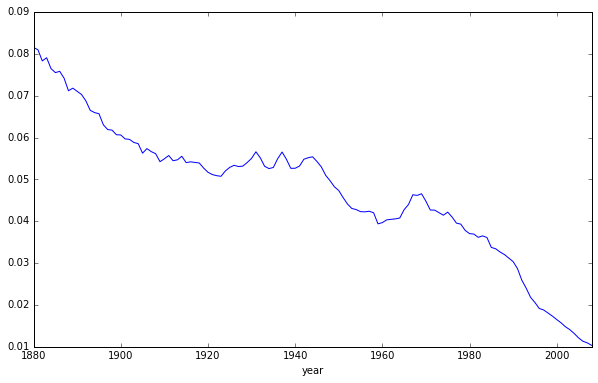

In [129]:
result.prop.plot() #quanto era frequente il nome piu' frequente nell'anno

In [130]:
boys[boys.name == 'Travis']

year    name      prop  sex soundex
563     1880  Travis  0.000101  boy    T612
2648    1882  Travis  0.000082  boy    T612
3672    1883  Travis  0.000080  boy    T612
4656    1884  Travis  0.000081  boy    T612
5602    1885  Travis  0.000095  boy    T612
6598    1886  Travis  0.000092  boy    T612
9871    1889  Travis  0.000059  boy    T612
10733   1890  Travis  0.000075  boy    T612
11696   1891  Travis  0.000082  boy    T612
12593   1892  Travis  0.000099  boy    T612
13831   1893  Travis  0.000066  boy    T612
14849   1894  Travis  0.000064  boy    T612
15735   1895  Travis  0.000079  boy    T612
16774   1896  Travis  0.000077  boy    T612
17645   1897  Travis  0.000098  boy    T612
18991   1898  Travis  0.000053  boy    T612
19658   1899  Travis  0.000095  boy    T612
20442   1900  Travis  0.000166  boy    T612
22552   1902  Travis  0.000121  boy    T612
23778   1903  Travis  0.000077  boy    T612
24510   1904  Travis  0.000137  boy    T612
25505   1905  Travis  0.000147  boy    T612
26587   1906  Travis  0.000118  boy    T612
27535   1907  Travis  0.000132  boy    T612
28512   1908  Travis  0.000150  boy    T612
29451   1909  Travis  0.000181  boy    T612
30510   1910  Travis  0.000149  boy    T612
31467   1911  Travis  0.000166  boy    T612
32448   1912  Travis  0.000171  boy    T612
33413   1913  Travis  0.000203  boy    T612
...      ...     ...       ...  ...     ...
99035   1979  Travis  0.006169  boy    T612
100036  1980  Travis  0.005808  boy    T612
101039  1981  Travis  0.005435  boy    T612
102038  1982  Travis  0.005525  boy    T612
103040  1983  Travis  0.005627  boy    T612
104041  1984  Travis  0.005461  boy    T612
105045  1985  Travis  0.004725  boy    T612
106048  1986  Travis  0.004416  boy    T612
107041  1987  Travis  0.005335  boy    T612
108040  1988  Travis  0.005711  boy    T612
109040  1989  Travis  0.005500  boy    T612
110041  1990  Travis  0.005325  boy    T612
111043  1991  Travis  0.004786  boy    T612
112047  1992  Travis  0.004239  boy    T612
113049  1993  Travis  0.003845  boy    T612
114052  1994  Travis  0.003338  boy    T612
115065  1995  Travis  0.002788  boy    T612
116072  1996  Travis  0.002576  boy    T612
117080  1997  Travis  0.002346  boy    T612
118097  1998  Travis  0.001937  boy    T612
119101  1999  Travis  0.001770  boy    T612
120114  2000  Travis  0.001576  boy    T612
121133  2001  Travis  0.001424  boy    T612
122143  2002  Travis  0.001306  boy    T612
123158  2003  Travis  0.001209  boy    T612
124165  2004  Travis  0.001164  boy    T612
125173  2005  Travis  0.001114  boy    T612
126162  2006  Travis  0.001186  boy    T612
127169  2007  Travis  0.001087  boy    T612
128176  2008  Travis  0.001025  boy    T612

[125 rows x 5 columns]

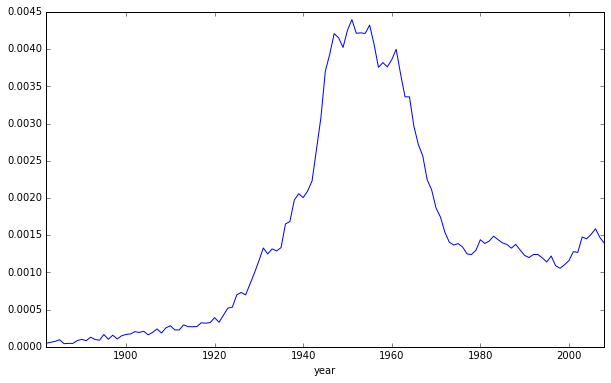

In [143]:
boys.set_index(['name', 'year']).ix['Alan'].prop.plot()

In [ ]:
idf = boys.set_index(['name', 'year'])

In [ ]:
idf[-50:]

In [ ]:
idf.ix['Travis']

In [ ]:
idf.ix['Travis'].prop.plot()

In [ ]:
boys.groupby('name')['prop'].mean()

In [ ]:
boys.groupby('name')['prop'].mean().sort_values()

In [ ]:
boys['prop'].describe() 

In [ ]:
result = boys.groupby('year')['prop'].describe()

In [ ]:
result[:50]

In [ ]:
df = boys[boys.year == 2008]

In [ ]:
df.prop

In [139]:
df = boys[boys.year == 2008].sort_values(by='prop', ascending=False) 

In [140]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
128003    0.008799
128004    0.008702
128005    0.008566
128006    0.008442
128007    0.008438
128008    0.008268
128009    0.008061
128010    0.007877
128011    0.007694
128012    0.007570
128013    0.007467
128014    0.007262
128015    0.007165
128016    0.006952
128017    0.006754
128018    0.006372
128019    0.006102
128020    0.006085
128021    0.006042
128022    0.005985
128023    0.005974
128024    0.005930
128025    0.005905
128026    0.005838
128027    0.005829
128028    0.005752
128029    0.005414
            ...   
128975    0.000094
128974    0.000094
128969    0.000094
128972    0.000094
128970    0.000094
128968    0.000094
128971    0.000094
128977    0.000093
128978    0.000093
128979    0.000093
128980    0.000093
128981    0.000093
128982    0.000093
128983    0.000092
128984    0.000092
128985    0.000092
128988    0.000091
128989    0.000091
128986    0.000091
128987    0.000091
128990    0.000090
128991    0.

In [ ]:
df.prop.cumsum() 

In [ ]:
df.prop.values.cumsum().searchsorted(0.5)   # Also used as a measure of diversity.

In [ ]:
df.prop.cumsum()[:130]

In [ ]:
def get_quantile_count(group, quantile = 0.5):
    df = group.sort_values(by='prop', ascending=False)
    return df.prop.values.cumsum().searchsorted(quantile)

boys.groupby('year').apply(get_quantile_count).plot()

In [ ]:
def get_quantile_count(group, quantile=0.5):
    group = group.groupby('soundex').sum()
    df = group.sort_values(by='prop', ascending=False)
    return df.prop.values.cumsum().searchsorted(quantile)

q = 0.25
boy_ct = boys.groupby('year').apply(get_quantile_count, quantile=q)   # pass different values for quantile
girl_ct = girls.groupby('year').apply(get_quantile_count, quantile=q)
boy_ct.plot(label='boy')
girl_ct.plot(label='girl')
legend(loc='best')

In [ ]:
boys[boys.year == 2008].prop.rank() 

In [ ]:
grouped = boys.groupby('year')['prop']

In [ ]:
grouped.transform(pd.Series.rank)

In [ ]:
boys['year_rank'] = grouped.transform(pd.Series.rank)

In [ ]:
boys[boys.name == 'Andrew'].year_rank.plot()

In [ ]:
names   

In [ ]:
births = pd.read_csv('births.csv')

In [ ]:
merged = pd.merge(names, births, on=['year', 'sex'])  

In [ ]:
pd.merge(names, births) 

In [ ]:
merged['persons'] = np.floor(merged.prop * merged.births)

In [ ]:
merged.head()

In [ ]:
merged.groupby(['name', 'sex'])['persons'].sum() 

In [ ]:
merged.groupby(['name', 'sex'])['persons'].sum().sort_values()

In [ ]:
mboys = pd.merge(boys, births) 

In [ ]:
mboys['persons'] = np.floor(mboys.prop * mboys.births)

In [ ]:
persons = mboys.set_index(['year', 'name']).persons 

In [ ]:
type(persons)  

In [ ]:
persons 

In [ ]:
persons.ix[:, 'Christopher'].plot(kind='bar', rot=90)  # Plot is crowded. Matplotlib doesn't go more than 130 in x axis.

---

Reproduction of [Quantifying Trading Behavior in Financial Markets Using Google Trends](http://www.nature.com/srep/2013/130425/srep01684/pdf/srep01684.pdf)
==============================================

In this section we will reproduce a paper published recently on using Google Trends search volume for specific terms (e.g. 'debt') to predict market movements.

In [ ]:
from IPython.core.display import HTML
HTML("<iframe src=http://www.nature.com/srep/2013/130425/srep01684/full/srep01684.html width=900 height=400></iframe>")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))

Tobias Preis was kind enough to provide me with the data used in this publication. There are many Google Trends search words but here we will only be using 'debt'.

In [ ]:
data = pd.read_csv('GoogleTrendsData.csv', index_col='Date', parse_dates=True)
data.head()

djia is the Dow Jones Industrial Average

In [ ]:
data.plot(subplots=True)

The authors detect if search volume is relatively increasing or decreasing in any given week by forming a moving average and testing if the current value crosses the moving average of the past 3 weeks. 

Lets first compute the moving average.

In [ ]:
data['debt_mavg'] = data.debt.rolling(window=3).mean()
data.head()

Since we want to see if the current value is above the moving average of the *preceeding* weeks, we have to shift the moving average timeseries forward by one.

In [ ]:
data['debt_mavg'] = data.debt_mavg.shift(1)
data.head(10)

### Generate the order signals.

From the paper:

"We use Google Trends to determine how many searches n(t – 1) have been carried out for a specific search term such as debt in week t – 1, where Google defines weeks as ending on a Sunday, relative to the total number of searches carried out on Google during that time."

and

"We implement this strategy by selling the DJIA at the closing price p(t) on the first trading day of week t, if Δn(t − 1, Δt) > 0, and buying the DJIA at price p(t + 1) at the end of the first trading day of the following week. [...]. If instead Δn(t − 1, Δt) < 0, then we buy the DJIA at the closing price p(t) on the first trading day of week t and sell the DJIA at price p(t + 1) at the end of the first trading day of the coming week."

In [ ]:
data.loc[:, 'order'] = 0
data.loc[data.debt > data.debt_mavg, 'order'] = -1 # Short if search volume goes up relative to mavg.
data.loc[data.debt < data.debt_mavg, 'order'] = 1 # Long if search volume goes down relative to mavg.
data.head(10)

### Compute returns

In [ ]:
data['ret_djia'] = data.djia.pct_change()
data.head()

Returns at week `t` are relative to week `t-1`. However, we are buying at week `t` and selling at week `t+1`, so we have to adjust by shifting the returns upward.

In [ ]:
data['ret_djia'] = data['ret_djia'].shift(-1)
data.head()

The algorithm that is used by the authors makes a decision every Monday of whether to long or short the Dow Jones. After this week passed, we exit all positions (sell if we longed, buy if we shorted) and make a new trading decision.

The `ret` column contains the weekly returns. Thus, if we buy at week `t` sell at week `t+1` we make the returns of week `t+1`. Conversely, if we short at week `t` and buy back at week `t+1` we make the negative returns of week `t+1`.

In [ ]:
# Compute returns of our strategy
data['ret_google'] = data.order * data.ret_djia
data.head(10)

Now we just have to compound the returns. As we are reinvesting our earns, returns actually do not compound by summing them up but by taking their cumulative product:

$$i_t = (i_{t-1} + i_{t-1} \cdot r_t) = (1 + r_t) \cdot i_{t-1}, \quad i_0 = 1$$

In [ ]:
figure(figsize=(9, 2))
(1 + data.ret_google).cumprod().plot()
plt.ylabel('Portfolio value')

In [ ]:
from IPython.core.display import Image 
Image("http://www.nature.com/srep/2013/130425/srep01684/carousel/srep01684-f2.jpg")

# Credits

This notebook was partly extracted from the Tutorial of Wes McKinney, author of Pandas, at Pycon 2013 in Santa Clara.


The Google Trends example was extracted from the tutorial **Financial Analysis in Python**, given by Thomas Wiecki at PyData Boston 2013